# TP3 Deep Learning CNN : 
> Ce TP est effectué par :
**Sandra Mourali**- **Anas Chaibi** - **Salma Ghabri** - **Aziz Bellaaj** - **Louay Badri**
---

In [1]:
import numpy as np
import keras.backend as K
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, model_from_json, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
K.set_image_data_format('channels_first') 
seed = 7 
np.random.seed(seed)

In [26]:
def plotHistory(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.ylim(0, 1.1)
    plt.grid()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'])
    plt.title('Accuracy Curve')
    try :
        plt.subplot(1, 3, 2)
        plt.ylim(0, 1.1)
        plt.grid()
        plt.plot(history.history['mean_io_u'])
        plt.plot(history.history['val_mean_io_u'])
        plt.ylabel('IoU')
        plt.xlabel('Epochs')
        plt.legend(['Training', 'Validation'])
        plt.title('IoU Curve')

        plt.subplot(1, 3, 3)
        plt.grid()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.legend(['Training', 'Validation'], loc='upper right')
        plt.title('Loss Curve')

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 3, 1)
        plt.ylim(0, 1.1)
        plt.grid()
        plt.plot(history.history['precision'])
        plt.plot(history.history['val_precision'])
        plt.ylabel('Precision')
        plt.xlabel('Epochs')
        plt.legend(['Training', 'Validation'])
        plt.title('Precision Curve')

        plt.subplot(1, 3, 2)
        plt.ylim(0, 1.1)
        plt.grid()
        plt.plot(history.history['recall'])
        plt.plot(history.history['val_recall'])
        plt.ylabel('Recall')
        plt.xlabel('Epochs')
        plt.legend(['Training', 'Validation'])
        plt.title('Recall Curve')
    except : pass
    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    title = 'Normalized confusion matrix'
        
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [89]:
def predictModel(predictions, y_unseen):
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_unseen, axis=1)
    classes = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # for MNIST
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=classes,
                        title='Confusion matrix')
    plt.show()

In [46]:
def get_data_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') 
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') 
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]
    return (X_train, y_train), (X_test, y_test), num_classes
def get_data_minist():
  np_utils = tf.keras.utils
  (X_train, y_train),(X_test, y_test)= mnist.load_data()

  # reshape to be [samples][pixels][width][height]
  X_train = X_train.reshape(X_train.shape[0], 1, 28,28).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
  y_train = np_utils.to_categorical(y_train)
  y_test = np_utils.to_categorical(y_test)
  num_classes = y_test.shape[1]

  return (X_train, y_train), (X_test, y_test), num_classes

In [5]:
IoU=tf.keras.metrics.MeanIoU(num_classes=16)
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1] * 100))
    print("Model error rate : %.2f%%" % (100 - scores[1] * 100))
    return history

def print_model_error_rate(model, X_test, y_test):
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1]*100))
    print("Model error rate : %.2f%%" % (100-scores[1]*100))

In [90]:
def save_keras_model(model, filename):
  # serialize model to JSON
  model_json = model.to_json()
  with open(filename+".json", "w") as json_file:
    json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(filename+".weights"+".h5")

def load_keras_model(filename):
  # load json and create model
  json_file = open(filename+".json", 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(filename+".weights"+".h5")
  return loaded_model

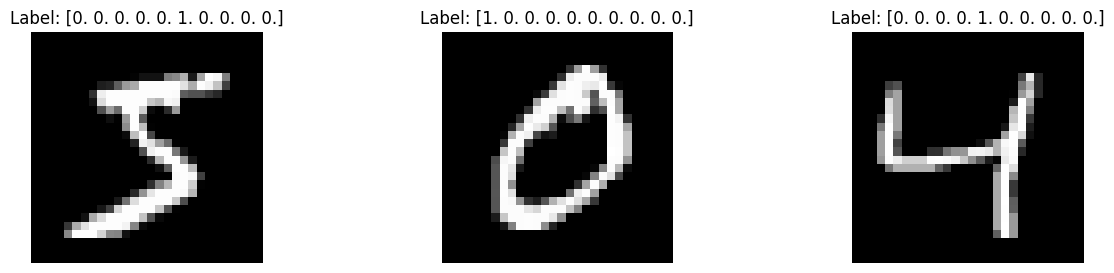

In [8]:
def plot_mnist_samples(X_train, y_train, num_samples=3):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.show()

(X_train, y_train), _, _ = get_data_mnist()
plot_mnist_samples(X_train, y_train)


# Model Definition :

In [29]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
num_classes

10

In [49]:
def small_model():
    # create model
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',IoU,'precision','recall'])
    return model

(X_train, y_train), (X_test, y_test), num_classes = get_data_minist()
smallModel = small_model()
history_small=smallModel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10


c:\Users\HP OMEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 156s 518ms/step - accuracy: 0.8179 - loss: 2.8955 - mean_io_u: 0.4571 - precision: 0.8392 - recall: 0.7994 - val_accuracy: 0.9732 - val_loss: 0.0867 - val_mean_io_u: 0.4562 - val_precision: 0.9771 - val_recall: 0.9713
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 157s 522ms/step - accuracy: 0.9801 - loss: 0.0624 - mean_io_u: 0.4759 - precision: 0.9821 - recall: 0.9787 - val_accuracy: 0.9777 - val_loss: 0.0764 - val_mean_io_u: 0.4866 - val_precision: 0.9794 - val_recall: 0.9763
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 158s 526ms/step - accuracy: 0.9886 - loss: 0.0362 - mean_io_u: 0.5217 - precision: 0.9896 - recall: 0.9879 - val_accuracy: 0.9788 - val_loss: 0.0751 - val_mean_io_u: 0.5564 - val_precision: 0.9806 - val_recall: 0.9783
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 159s 531ms/step - accuracy: 0.9919 - loss: 0.0236 - mean_io_u: 0.5906 - precision: 0.9923 - recall: 0.9915 - val_accuracy: 0.9787 - val_loss: 0.0800 - val_mean_io_u: 0.6230 - val_precision: 0.9799 

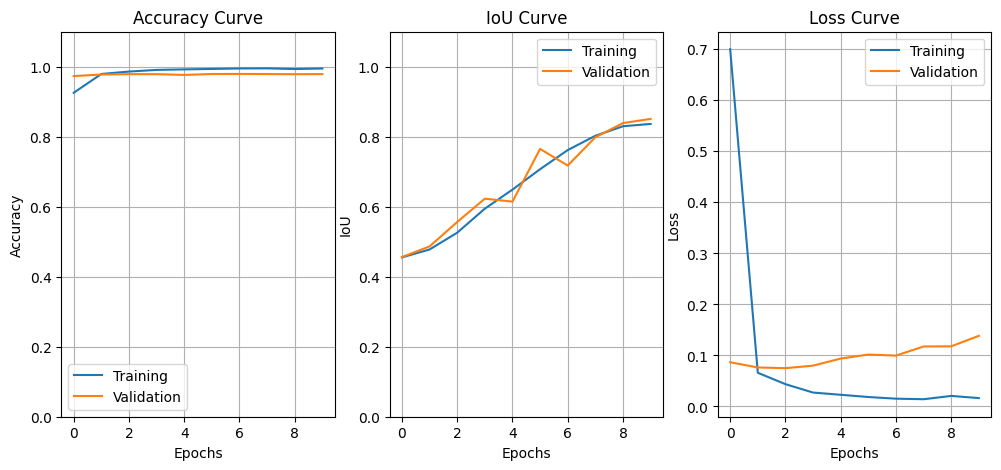

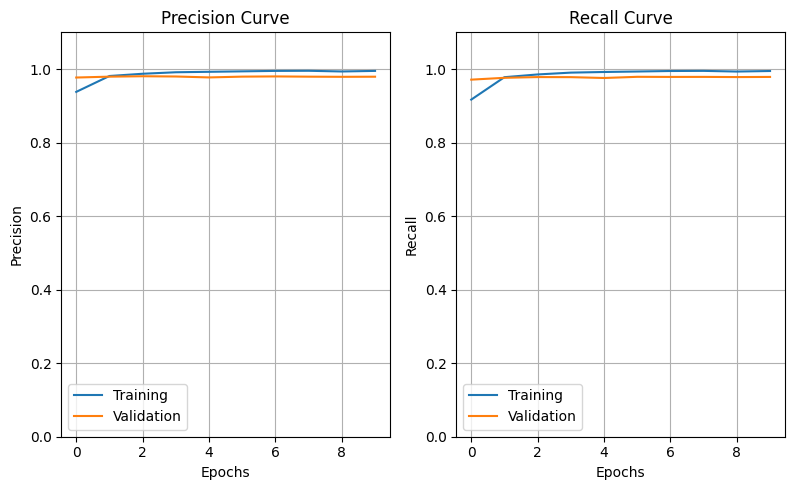

<Figure size 640x480 with 0 Axes>

In [50]:
plotHistory(history_small)

In [60]:
save_keras_model(smallModel , "small_model")

## Medium CNN :

In [61]:
def medium_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',IoU,'precision','recall'])
    return model

(X_train, y_train), (X_test, y_test), num_classes = get_data_minist()
# build the model
mediumModel = medium_model()
# Fit the model
medium_history=mediumModel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# evaluation :
print_model_error_rate(mediumModel, X_test, y_test)

Epoch 1/10


c:\Users\HP OMEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 145s 480ms/step - accuracy: 0.7997 - loss: 4.7447 - mean_io_u: 0.6018 - precision: 0.8116 - recall: 0.7901 - val_accuracy: 0.9667 - val_loss: 0.1289 - val_mean_io_u: 0.4841 - val_precision: 0.9704 - val_recall: 0.9640
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 146s 488ms/step - accuracy: 0.9675 - loss: 0.1111 - mean_io_u: 0.4840 - precision: 0.9711 - recall: 0.9652 - val_accuracy: 0.9758 - val_loss: 0.0845 - val_mean_io_u: 0.4724 - val_precision: 0.9794 - val_recall: 0.9740
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 138s 460ms/step - accuracy: 0.9799 - loss: 0.0648 - mean_io_u: 0.4999 - precision: 0.9817 - recall: 0.9785 - val_accuracy: 0.9802 - val_loss: 0.0703 - val_mean_io_u: 0.5055 - val_precision: 0.9817 - val_recall: 0.9789
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 139s 463ms/step - accuracy: 0.9857 - loss: 0.0447 - mean_io_u: 0.5265 - precision: 0.9871 - recall: 0.9849 - val_accuracy: 0.9803 - val_loss: 0.0735 - val_mean_io_u: 0.5360 - val_precision: 0.9825 

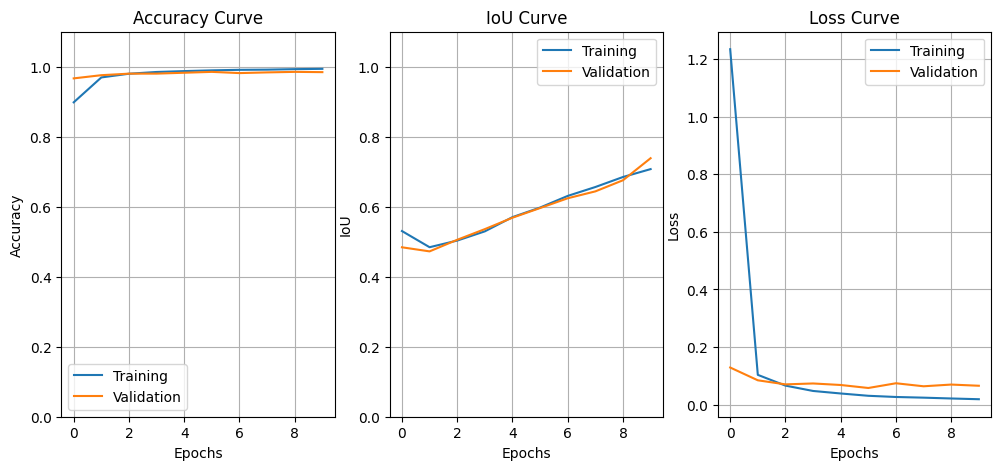

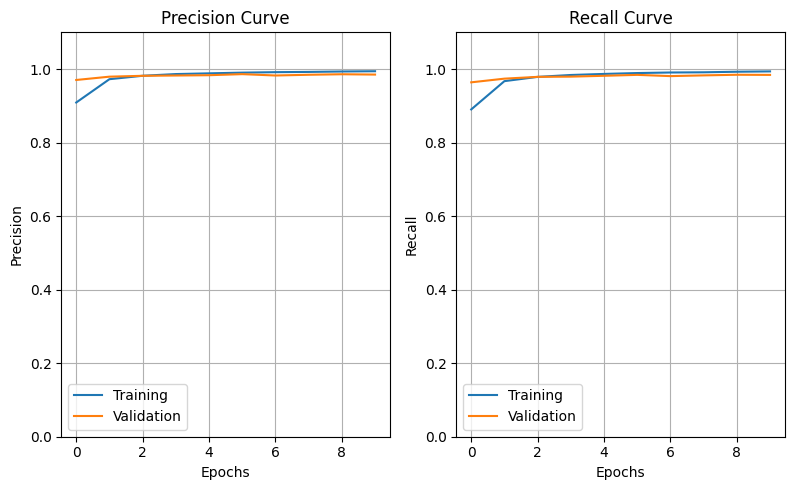

<Figure size 640x480 with 0 Axes>

In [62]:
plotHistory(medium_history)
save_keras_model(mediumModel, "medium_model")

In [63]:
def large_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',IoU,'precision','recall'])
    return model

(X_train, y_train), (X_test, y_test), num_classes = get_data_minist()
largeModel = large_model()
# Fit the model
large_history=largeModel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# evaluation :
print_model_error_rate(largeModel, X_test, y_test)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 132s 435ms/step - accuracy: 0.6808 - loss: 1.7188 - mean_io_u: 0.5444 - precision: 0.7548 - recall: 0.6168 - val_accuracy: 0.9730 - val_loss: 0.0908 - val_mean_io_u: 0.4610 - val_precision: 0.9765 - val_recall: 0.9703
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 432ms/step - accuracy: 0.9576 - loss: 0.1419 - mean_io_u: 0.4649 - precision: 0.9644 - recall: 0.9526 - val_accuracy: 0.9792 - val_loss: 0.0643 - val_mean_io_u: 0.4692 - val_precision: 0.9809 - val_recall: 0.9774
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 433ms/step - accuracy: 0.9707 - loss: 0.0934 - mean_io_u: 0.4734 - precision: 0.9745 - recall: 0.9678 - val_accuracy: 0.9837 - val_loss: 0.0555 - val_mean_io_u: 0.4757 - val_precision: 0.9857 - val_recall: 0.9823
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 128s 428ms/step - accuracy: 0.9751 - loss: 0.0789 - mean_io_u: 0.4788 - precision: 0.9777 - recall: 0.9728 - val_accuracy: 0.9873 - val_loss: 0.0458 - val_mean_io_u: 0.5299 - val_precisi

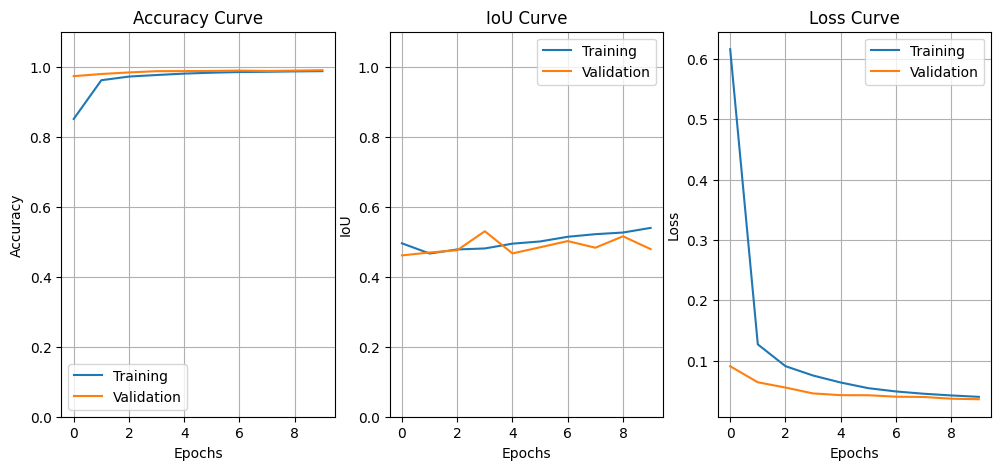

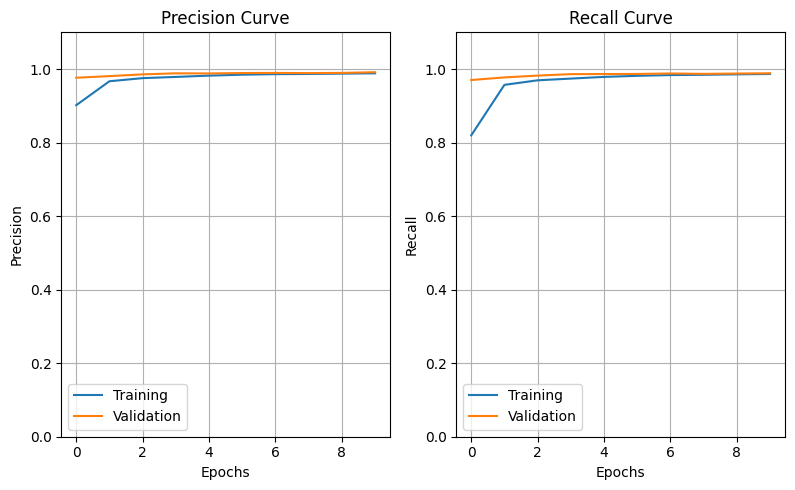

<Figure size 640x480 with 0 Axes>

In [85]:
plotHistory(large_history)
save_keras_model(largeModel, "large_model")

## Load model weights and perform classifications with it :

In [88]:
(X_unseen, y_unseen), _, _ = get_data_minist()

small_loaded_model = load_keras_model("small_model")
small_predictions = small_loaded_model.predict(X_unseen)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 58ms/step


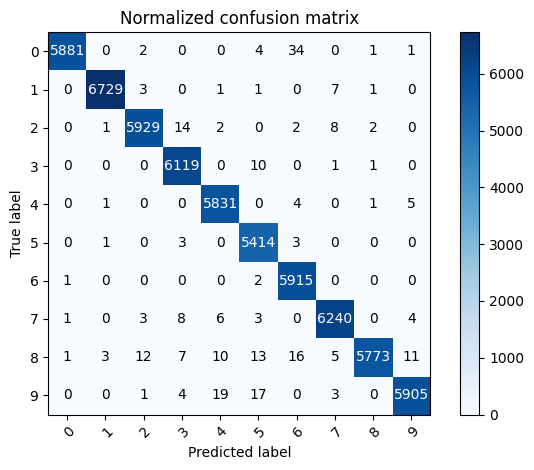

In [91]:
predictModel(small_predictions, y_unseen)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 58ms/step


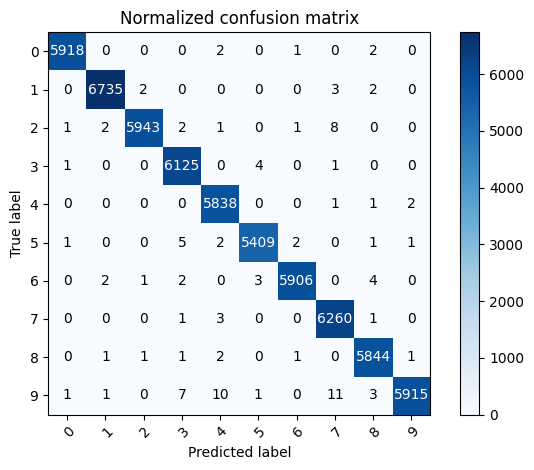

In [93]:
(X_unseen, y_unseen), _, _ = get_data_minist()

medium_loaded_model = load_keras_model("medium_model")
medium_predictions = medium_loaded_model.predict(X_unseen)
predictModel(medium_predictions, y_unseen)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 61ms/step


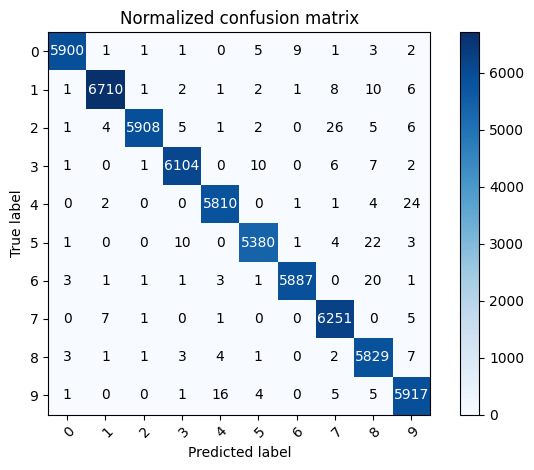

In [94]:
(X_unseen, y_unseen), _, _ = get_data_minist()

large_loaded_model = load_keras_model("large_model")
large_predictions = large_loaded_model.predict(X_unseen)
predictModel(large_predictions, y_unseen)